In [3]:
%load_ext autoreload
%autoreload 2

import sys
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from keras.models import load_model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/Colab Notebooks/')
import utils

Mounted at /content/drive


In [5]:
datasets = ["col", "ind", "jor", "kaz", "mys", "per", "per2", "sau", "tha",\
            "tur", "ven"]
data_iteration = 0

In [6]:
# A fine-tuned model from betterModel.ipynb

model_name = "VGG16"
#model_name = "EfficientNetB0"
#model_name = "ResNet50"

training_data = "data_combo_1"

model = load_model(f'/content/drive/MyDrive/CAFO_models/{model_name}_{training_data}/model_ft.keras')

In [7]:
data_path = "/content/drive/MyDrive/CAFO_data/forTraining/"

gdf_list = []
for place in datasets:
  gdf = pd.read_pickle(f'{data_path}{place}_iter{data_iteration}.pkl')
  print(f"There are {len(gdf)} rows in the {place} dataset")
  gdf_list.append(gdf)

data = pd.concat(gdf_list).reset_index(drop=True)

There are 225 rows in the col dataset
There are 156 rows in the ind dataset
There are 76 rows in the jor dataset
There are 69 rows in the kaz dataset
There are 229 rows in the mys dataset
There are 275 rows in the per dataset
There are 180 rows in the per2 dataset
There are 279 rows in the sau dataset
There are 250 rows in the tha dataset
There are 119 rows in the tur dataset
There are 264 rows in the ven dataset


In [8]:
X = []
labels = []

for idx, row in data.iterrows():
  if row['Farm type'] == "Unknown CAFO":
    labels.append("CAFO")
    X.append(row["Sentinel"])
  elif row['Farm type'] == "Non-farm":
    labels.append("Non-farm")
    X.append(row["Sentinel"])
  else:
    print(f"Unexpected farm type, {row['Farm type']}")

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
y = to_categorical(encoded_labels, num_classes=len(set(labels)))

class_mapping = dict(zip(encoded_labels, labels))
print("Class mapping:", class_mapping)

meta = data.drop(columns=["Sentinel"])

Class mapping: {1: 'Non-farm', 0: 'CAFO'}


In [9]:
# Apply the model to all images
print(f"Applying the model to all {len(X)} images...")
results = utils.get_predictions(model, X, y, model_name, data)

Applying the model to all 2122 images...


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


67/67 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step


In [10]:
print('\n', classification_report(results["Label"].to_list(), results['Model Class'].to_list()))


               precision    recall  f1-score   support

           0       0.74      0.73      0.73       802
           1       0.84      0.84      0.84      1320

    accuracy                           0.80      2122
   macro avg       0.79      0.78      0.79      2122
weighted avg       0.80      0.80      0.80      2122



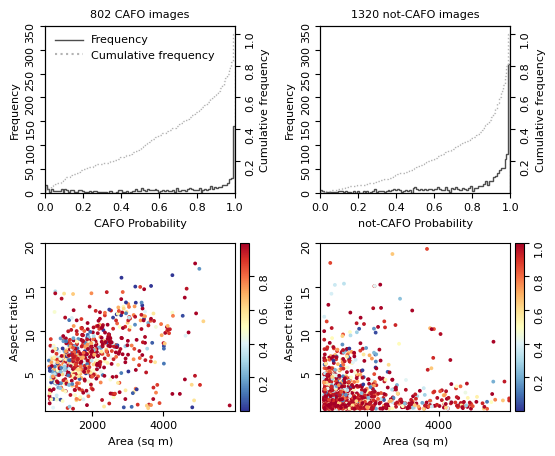

In [11]:
utils.probability_hist(results, ymax=350, fname='hist_hor')

In [12]:
colombia = results[results["Dataset name"] == "Colombia"]
india = results[results["Dataset name"] == "India"]
jordan = results[results["Dataset name"] == "Jordan"]
kazakhstan = results[results["Dataset name"] == "Kazakhstan"]
malaysia = results[results["Dataset name"] == "Malaysia"]
peru = results[results["Dataset name"] == "Peru"]
peru2 = results[results["Dataset name"] == "Peru2"]
saudi = results[results["Dataset name"] == "Saudi"]
thailand = results[results["Dataset name"] == "Thailand"]
turkey = results[results["Dataset name"] == "Turkey"]
venezuela = results[results["Dataset name"] == "Venezuela"]

299 images have label = 0 and p(CAFO) > 0.9
30 images have label = 1 and p(CAFO) > 0.9


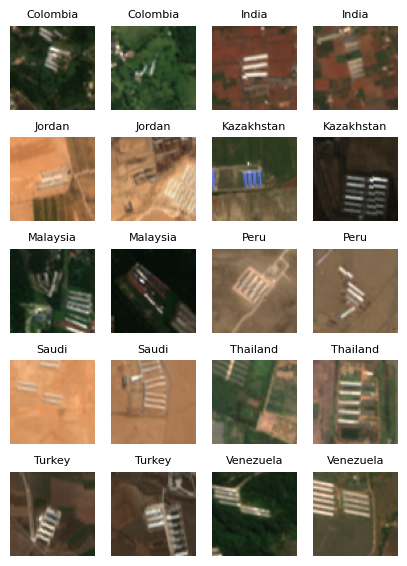

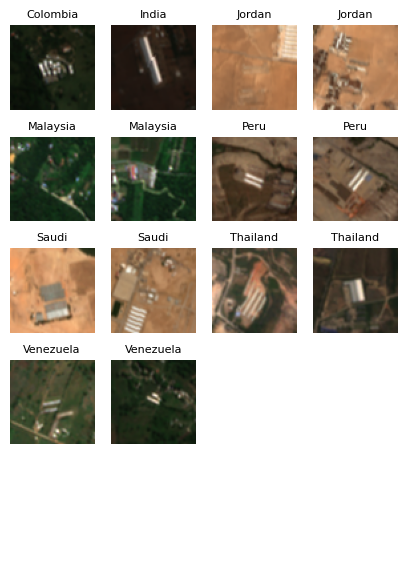

In [13]:
dfs= [colombia, india, jordan, kazakhstan, malaysia, peru, saudi,\
           thailand, turkey, venezuela]

utils.show_random_images(dfs, 0, 0.9, 'true_positives')
utils.show_random_images(dfs, 1, 0.9, 'false_positives')

# Colombia


In [14]:
print('\n', classification_report(colombia["Label"].to_list(), colombia['Model Class'].to_list()))


               precision    recall  f1-score   support

           0       0.96      0.77      0.86       175
           1       0.53      0.90      0.67        50

    accuracy                           0.80       225
   macro avg       0.75      0.84      0.76       225
weighted avg       0.87      0.80      0.81       225



In [15]:
utils.plot_classified_images(X, colombia, class_mapping, ascending=False)

Output hidden; open in https://colab.research.google.com to view.

# India

In [16]:
print('\n', classification_report(india["Label"].to_list(), india['Model Class'].to_list()))


               precision    recall  f1-score   support

           0       0.79      0.71      0.75        86
           1       0.68      0.77      0.72        70

    accuracy                           0.74       156
   macro avg       0.74      0.74      0.74       156
weighted avg       0.74      0.74      0.74       156



In [17]:
utils.plot_classified_images(X, india, class_mapping, ascending=False)

Output hidden; open in https://colab.research.google.com to view.

# Jordan

In [18]:
print('\n', classification_report(jordan["Label"].to_list(), jordan['Model Class'].to_list()))


               precision    recall  f1-score   support

           0       0.47      0.82      0.60        17
           1       0.93      0.73      0.82        59

    accuracy                           0.75        76
   macro avg       0.70      0.78      0.71        76
weighted avg       0.83      0.75      0.77        76



In [19]:
utils.plot_classified_images(X, jordan, class_mapping, ascending=False)

Output hidden; open in https://colab.research.google.com to view.

# Kazakhstan

In [20]:
print('\n', classification_report(kazakhstan["Label"].to_list(), kazakhstan['Model Class'].to_list()))


               precision    recall  f1-score   support

           0       0.86      0.66      0.75        29
           1       0.79      0.93      0.85        40

    accuracy                           0.81        69
   macro avg       0.83      0.79      0.80        69
weighted avg       0.82      0.81      0.81        69



In [21]:
utils.plot_classified_images(X, kazakhstan, class_mapping, ascending=False)

Output hidden; open in https://colab.research.google.com to view.

# Malaysia

In [22]:
print('\n', classification_report(malaysia["Label"].to_list(), malaysia['Model Class'].to_list()))


               precision    recall  f1-score   support

           0       0.57      0.96      0.71        49
           1       0.99      0.80      0.88       180

    accuracy                           0.83       229
   macro avg       0.78      0.88      0.80       229
weighted avg       0.90      0.83      0.85       229



In [23]:
utils.plot_classified_images(X, malaysia, class_mapping, ascending=False)

Output hidden; open in https://colab.research.google.com to view.

# Peru - Alto Laran

In [24]:
print('\n', classification_report(peru["Label"].to_list(), peru['Model Class'].to_list()))


               precision    recall  f1-score   support

           0       0.83      0.51      0.63       181
           1       0.46      0.80      0.58        94

    accuracy                           0.61       275
   macro avg       0.65      0.66      0.61       275
weighted avg       0.70      0.61      0.62       275



In [25]:
utils.plot_classified_images(X, peru, class_mapping, ascending=False)

Output hidden; open in https://colab.research.google.com to view.

# Peru - Punta Hermosa

In [26]:
print('\n', classification_report(peru2["Label"].to_list(), peru2['Model Class'].to_list()))


               precision    recall  f1-score   support

           0       0.55      0.67      0.60        24
           1       0.95      0.92      0.93       156

    accuracy                           0.88       180
   macro avg       0.75      0.79      0.77       180
weighted avg       0.89      0.88      0.89       180



In [27]:
utils.plot_classified_images(X, peru2, class_mapping, ascending=False)

Output hidden; open in https://colab.research.google.com to view.

# Saudi Arabia

In [28]:
print('\n', classification_report(saudi["Label"].to_list(), saudi['Model Class'].to_list()))


               precision    recall  f1-score   support

           0       0.49      0.96      0.65        47
           1       0.99      0.80      0.89       232

    accuracy                           0.83       279
   macro avg       0.74      0.88      0.77       279
weighted avg       0.91      0.83      0.85       279



In [29]:
utils.plot_classified_images(X, saudi, class_mapping, ascending=False)

Output hidden; open in https://colab.research.google.com to view.

# Thailand

In [30]:
print('\n', classification_report(thailand["Label"].to_list(), thailand['Model Class'].to_list()))


               precision    recall  f1-score   support

           0       0.78      0.64      0.71        76
           1       0.86      0.92      0.89       174

    accuracy                           0.84       250
   macro avg       0.82      0.78      0.80       250
weighted avg       0.83      0.84      0.83       250



In [31]:
utils.plot_classified_images(X, thailand, class_mapping, ascending=False)

Output hidden; open in https://colab.research.google.com to view.

# Turkey - Afyonkarahisar

In [32]:
print('\n', classification_report(turkey["Label"].to_list(), turkey['Model Class'].to_list()))


               precision    recall  f1-score   support

           0       0.57      0.72      0.63        18
           1       0.95      0.90      0.92       101

    accuracy                           0.87       119
   macro avg       0.76      0.81      0.78       119
weighted avg       0.89      0.87      0.88       119



In [33]:
utils.plot_classified_images(X, turkey, class_mapping, ascending=False)

Output hidden; open in https://colab.research.google.com to view.

# Venezuela

In [34]:
print('\n', classification_report(venezuela["Label"].to_list(), venezuela['Model Class'].to_list()))


               precision    recall  f1-score   support

           0       0.76      0.90      0.83       100
           1       0.93      0.83      0.88       164

    accuracy                           0.86       264
   macro avg       0.85      0.86      0.85       264
weighted avg       0.87      0.86      0.86       264



In [35]:
utils.plot_classified_images(X, venezuela, class_mapping, ascending=False)

Output hidden; open in https://colab.research.google.com to view.